# Introduction
1.The informaion is areplica of the notes for the abalone dataset from the UCI repository.The original owner of dataset is US Census Bureau (https://drive.google.com/open?id=17yZ1NSSsRrDF7qfGOJyGHRDDiBce7EQN).

2.Perform the data discription on this dataset with the following sections.

3.Discover and handle missing values remove the row whewr missing values occur,remove 'fnlwgt'column,percentage of rows that where removed.

4.Perform Univariate Analysis(PDF,Histographs,Boxplots,Countplots,etc)to understand yhe distribution of each numerical column.

5.Perform Bivariate Analysis(relationship between numerical columns using Scatter plots,Hexbin plots,pair plots ,etc)to identify patterns using swarmplot,boxplot,barplot etc.

6.Conclusion and write observation.

7.Perform feature transformation : for numerical features->Do column Normalisation i.e use MinMaxScaler for Categorical->if more than two categories use dummy variables. otherwise convert thr feature to Binary.

8.Write your observations in English and always quantify your results.




# The Adult Dataset

# Description



1. Title of Database: adult.csv



2. Sources:

a) Original owner of Database- US Census Bureau.

b) Donor of Database- Ronny Kohavi and Barry Becker.

c)Date received-05/19/06.



3. Past Usage:


(a) Complete reference of article where it was described/used
@inproceedings{kohavi-nbtree,
author={Ron Kohavi},
title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid},
booktitle={Proceedings of the Second International Conference on Knowledge Discovery and Data Mining},
year = 1996,
pages={to appear}}.

(b) Indication of what attribute(s) were being predicted
Salary greater or less than 50,000.

(c) Indication of study's results (i.e. Is it a good domain to use?)
Hard domain with a nice number of records.



4. Relevant Information Paragraph


Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))



5. Number of Instances


48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).



6. Number of Attributes:


    6 continuous, 8 nominal attributes.



7. Attribute Information:


a) age: continuous.

b) workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.

c)education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

d) education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

e) occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

f) relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

g) race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

h) sex: Female, Male.

i)capital-gain: continuous.

j)capital-loss: continuous.

k)hours-per-week: continuous.

l)native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
class: >50K, <=50K



8. Missing Attribute Values:


7% have missing values.



9. Class Distribution:


Probability for the label '>50K' : 23.93% / 24.78% (without unknowns).

Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns).



10. Notes for Delve:


One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.

Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.

The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.






# Objective

The main objective of the dataset is to classify people earning <=50k or >50k based on several explainatory factors affecting the income of person like Age,Occupation,Education etc.

The methods we intend to use are :


-> Binary logistic Regression

-> Decision tree

->Random forest

In [26]:
# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Read dataset
missing_val=['?']
df = pd.read_csv("adult.csv",na_values=missing_val)

In [28]:
# Display the top 5 rows of the Dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [15]:
# tail of the dataset
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# How many rows and columns in Dataset
df.shape

(48842, 15)

In [16]:
# PANDAS INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [17]:
# Display the descriptive  statical analysis of on numerical columns of the dataset 
df.describe(include='number')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# DISCOVER AND HANDLE MISSING VALUES



In [18]:
total_rows=len(df)
del_rows = df.isnull().any(axis=1).sum()
print(total_rows,del_rows)

48842 3620


In [19]:
#Column with atleast one missing value
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [139]:
# missing value in columns
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [20]:
# Dropna function
df.dropna(axis =0,how='any',inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [21]:
df.drop(['fnlwgt'], axis=1 , inplace=True)


In [142]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [22]:
current_rows=len(df)
print(current_rows)

45222


In [23]:
print("percentage of rows that were removed:",100*(del_rows/total_rows),"%")

percentage of rows that were removed: 7.411653904426519 %


# UNIVARIATE ANALYSIS

HISTOGRAMS

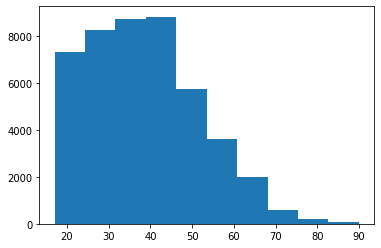

In [153]:
plt.hist(df['age'])
plt.show()

# OBSERVATION

1. 'age' attribute is not symmetric.
2. above graph is right skewed.

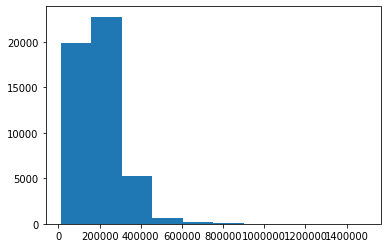

In [108]:

plt.hist(df['fnlwgt'])
plt.show()

# OBSERVATION

1. Through the graph we can state that it is not symmetric .
2. Max fnwgt 200000 to 380000 and later it gets fall.

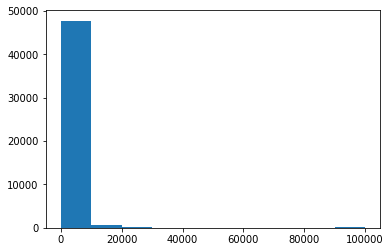

In [105]:
plt.hist(df['capital-gain'])
plt.show()

# OBSERVATION

1. In above graph we can sate that there are many individual with no gain and with gain.
2. and most of the individuals have large gain or no gain or just gain.

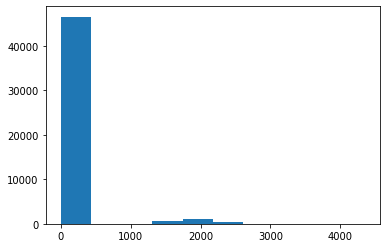

In [104]:
plt.hist(df['capital-loss'])
plt.show()

# OBSERVATION

Through graph we can state that for most of the individuals there are no capital loss and have some individuals with capital loss.

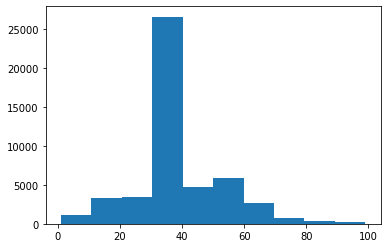

In [112]:
plt.hist(df['hours-per-week'])
plt.show()

# OBSERVATION

1. Through the data we can state that more individual workin around 40 hours per week.
2. There are also few who work 80-100 and soe less than 20.

 2. BOXPLOT

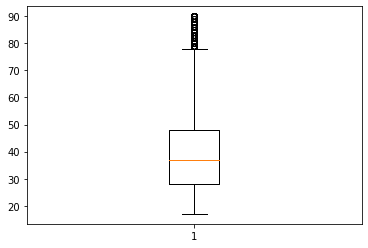

In [106]:
plt.boxplot(df['age'])
plt.show()

# OBSERVATION

1. Through the boxplot we can say that median age is 37.
2. There are some outliers between 78 and 90.

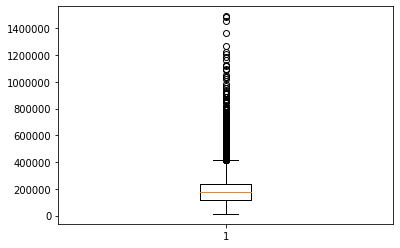

In [107]:
plt.boxplot(df['fnlwgt'])
plt.show()

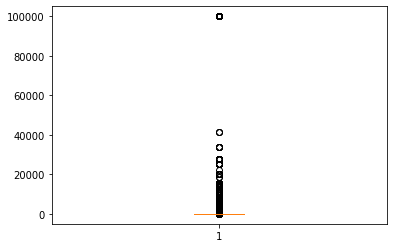

In [109]:
plt.boxplot(df['capital-gain'])
plt.show()

# OBSERVATION 

1. In boxplot there are majority of outliers. through we can state that gain can be zero.

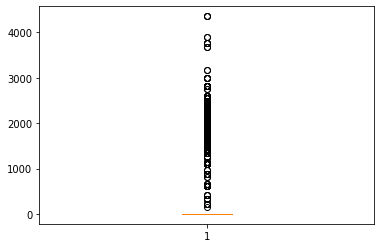

In [110]:
plt.boxplot(df['capital-loss'])
plt.show()

# OBSERVATION

There are majority of outliers through we can say that there is no individual with loss. it can be zero.

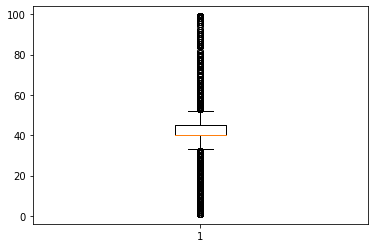

In [111]:
plt.boxplot(df['hours-per-week'])
plt.show()

# OBSERVATION

1. Through the boxplot we can sate that most of individuals work between 35-55 hours per week.

3.  PDF:

pdf= [0.1726383  0.17783875 0.18672454 0.18748209 0.1221285  0.07935793
 0.05028459 0.01590844 0.00567135 0.00196552]
bin_edges= [17.  24.3 31.6 38.9 46.2 53.5 60.8 68.1 75.4 82.7 90. ]


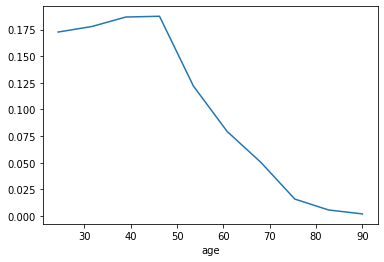

In [115]:
counts,bin_edges=np.histogram(df['age'],bins=10,density=True)
plt.xlabel('age')
pdf=counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

# OBSERVATION

Through pdf it is state taht age attribute is not symmetric.

pdf= [4.08234716e-01 4.66606609e-01 1.06977601e-01 1.37791245e-02
 3.09160149e-03 7.16596372e-04 3.07112731e-04 1.43319274e-04
 6.14225462e-05 8.18967282e-05]
bin_edges= [  12285.   160096.5  307908.   455719.5  603531.   751342.5  899154.
 1046965.5 1194777.  1342588.5 1490400. ]


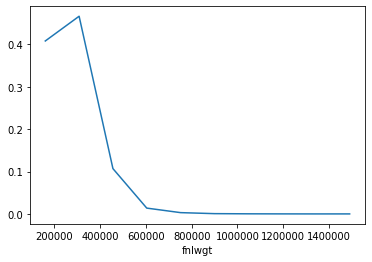

In [116]:
counts,bin_edges=np.histogram(df['fnlwgt'],bins=10,density=True)
plt.xlabel('fnlwgt')
pdf=counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

pdf= [9.76782278e-01 1.54170591e-02 2.62069530e-03 1.22845092e-04
 6.14225462e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.99570042e-03]
bin_edges= [    0.   9999.9 19999.8 29999.7 39999.6 49999.5 59999.4 69999.3 79999.2
 89999.1 99999. ]


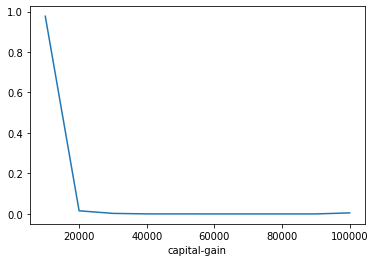

In [118]:
counts,bin_edges=np.histogram(df['capital-gain'],bins=10,density=True)
plt.xlabel('capital-gain')
pdf=counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

# OBSERVATION

THROUGH PDF IT STATE THAT GAIN IS MORE  LOW OR HIGH.

pdf= [9.53564555e-01 4.70906187e-04 5.93751280e-04 1.44547725e-02
 2.39343188e-02 6.28557389e-03 4.29957823e-04 4.09483641e-05
 1.63793456e-04 6.14225462e-05]
bin_edges= [   0.   435.6  871.2 1306.8 1742.4 2178.  2613.6 3049.2 3484.8 3920.4
 4356. ]


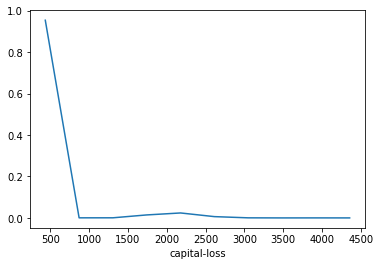

In [119]:
counts,bin_edges=np.histogram(df['capital-loss'],bins=10,density=True)
plt.xlabel('capital-loss')
pdf=counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

# OBSERVATION

THROUGH PDF we can stste that loss is low and increase both.

pdf= [0.02303345 0.06813808 0.06957127 0.54541174 0.0956349  0.11932353
 0.05409279 0.01398387 0.00644937 0.004361  ]
bin_edges= [ 1.  10.8 20.6 30.4 40.2 50.  59.8 69.6 79.4 89.2 99. ]


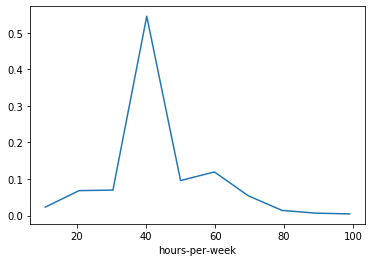

In [120]:
counts,bin_edges=np.histogram(df['hours-per-week'],bins=10,density=True)
plt.xlabel('hours-per-week')
pdf=counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

# BIVARIATE ANALYSIS

1. SCATTER PLOT

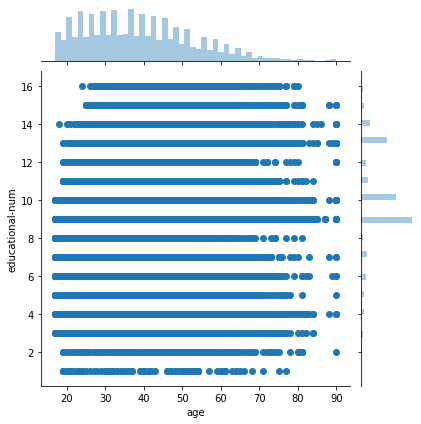

In [7]:
#scatterplot between age and educational-num
sns.jointplot(x='age',y='educational-num',data=df,kind='scatter')


# OBSERVATION

THROUGH THE PLOT EDUCATIONAL-NUM DECREASES TO ZERO WITH AGE

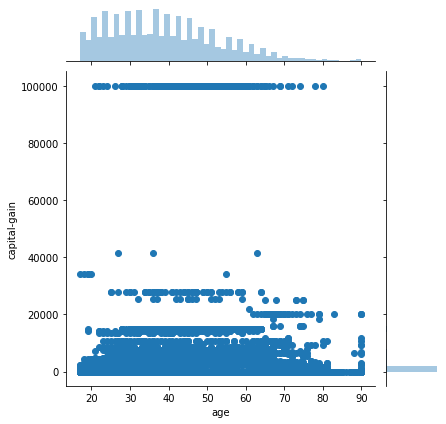

In [9]:
#sctter plot between age and capital gain
sns.jointplot(x='age',y='capital-gain',data=df,kind='scatter')
              

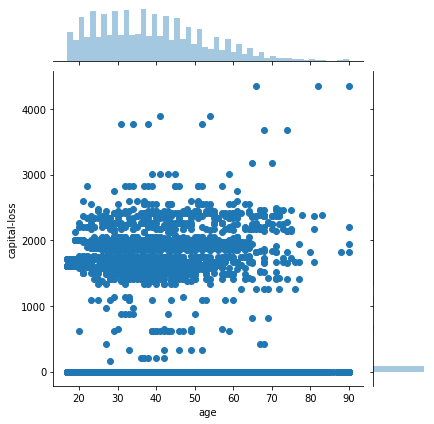

In [10]:
#scatter plot between age and capital-loss
sns.jointplot(x='age',y='capital-loss',data=df,kind='scatter')

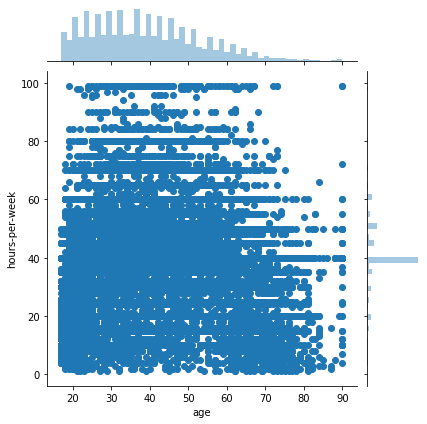

In [11]:
#scatter plot between age and hours-per-week
sns.jointplot(x='age',y='hours-per-week',data=df,kind='scatter')

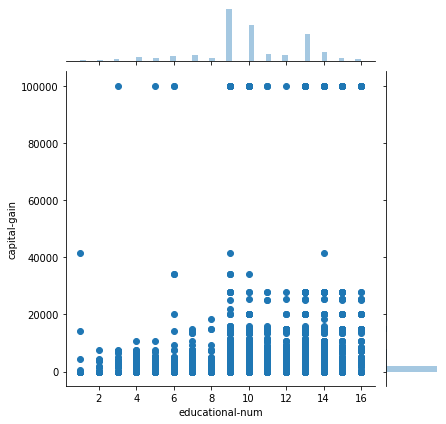

In [12]:
#scatter plot between educational-num and capital-gain
sns.jointplot(x='educational-num',y='capital-gain',data=df,kind='scatter')

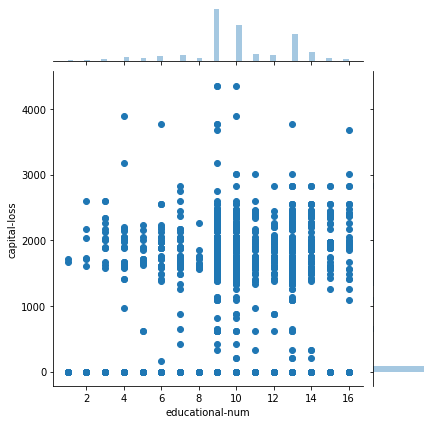

In [13]:
#scatter plot between educational-num and capital-loss
sns.jointplot(x='educational-num',y='capital-loss',data=df,kind='scatter')

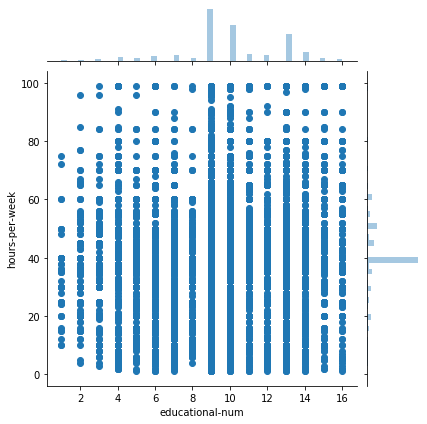

In [14]:
#scatter plot between educational-num and hours-per-week
sns.jointplot(x='educational-num',y='hours-per-week',data=df,kind='scatter')

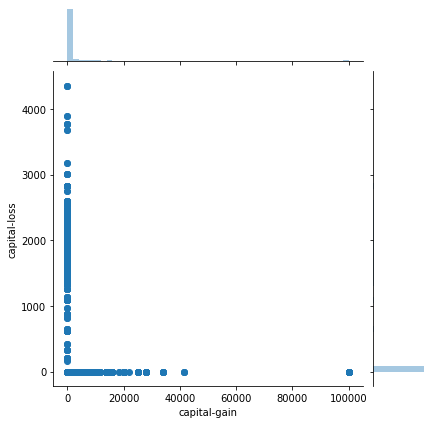

In [19]:
#scatter plot between capital-gain and capital-loss
sns.jointplot(x='capital-gain',y='capital-loss',data=df,kind='scatter')

# OBSERVATION

Through this plot we can state that capital gain and loss can be zero.
2. it also include if capital gain is zero then there is possibility of capital loss being high and vice versa.

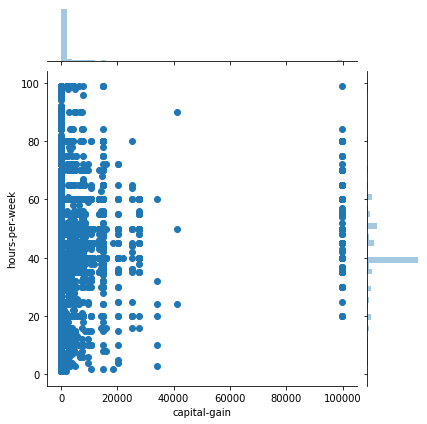

In [20]:
#scatter plot between capital-gain and hours-per-week
sns.jointplot(x='capital-gain',y='hours-per-week',data=df,kind='scatter')

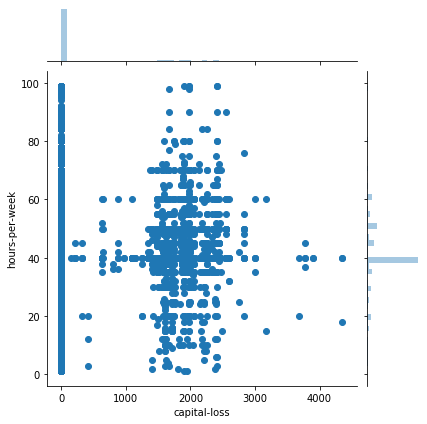

In [21]:
#scatter plot between capital-loss and hours-per-week
sns.jointplot(x='capital-loss',y='hours-per-week',data=df,kind='scatter')

# Observation

Through above plot it is state  that at min or zero capital loss hours per week will be max and  from 40-50range of hours per week sets more capital loss.

2. HEXBIN PLOT

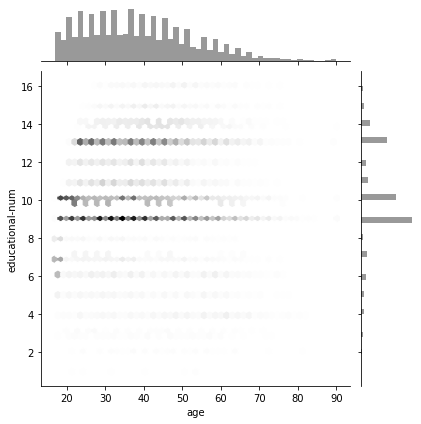

In [23]:
#Hexbin plot between age and educational-number
sns.jointplot(x='age',y='educational-num',data=df,kind='hexbin',color='k')

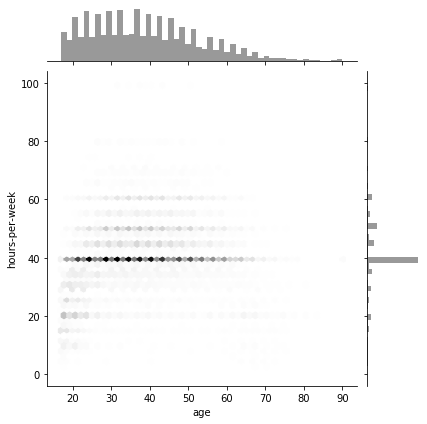

In [26]:
#Hexbin plot between age and hours-per-week
sns.jointplot(x='age',y='hours-per-week',data=df,kind='hexbin',color='k')

# OBSERVATION

IN this plot density is mainly between 40-60 hours per week where the age density is between 20 -65 year age.

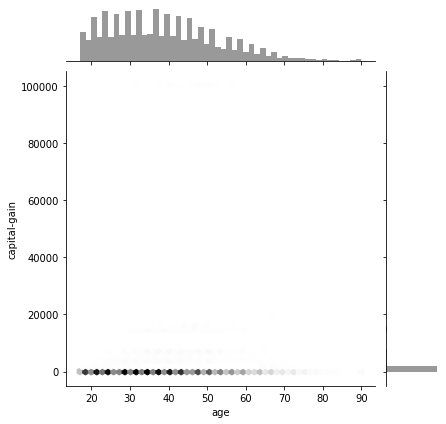

In [24]:
#Hexbin plot between age and capital-gain
sns.jointplot(x='age',y='capital-gain',data=df,kind='hexbin',color='k')

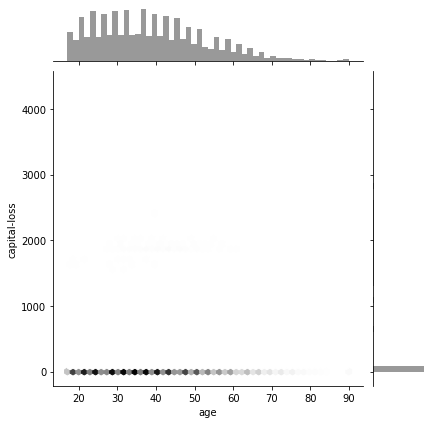

In [25]:
#Hexbin plot between age and capital-loss
sns.jointplot(x='age',y='capital-loss',data=df,kind='hexbin',color='k')

# OBSERVATION

In the above plot it is clear that destiny is around 20-75 whereas at more age capital loss will be min.

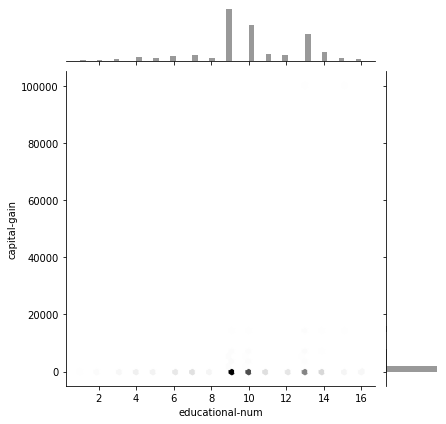

In [27]:
#Hexbin plot between educational-num and capital-gain
sns.jointplot(x='educational-num',y='capital-gain',data=df,kind='hexbin',color='k')

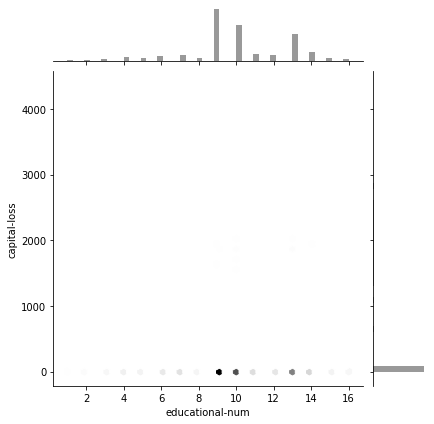

In [28]:
#Hexbin plot between educational-num and capital-loss
sns.jointplot(x='educational-num',y='capital-loss',data=df,kind='hexbin',color='k')

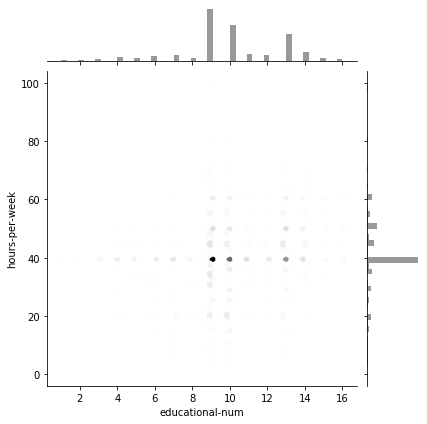

In [29]:
#Hexbin plot between educational-num and hours-per-week
sns.jointplot(x='educational-num',y='hours-per-week',data=df,kind='hexbin',color='k')

# OBSERVATION

Through the above plot it is state that the destiny lies in middle or lies near the mid of the plot

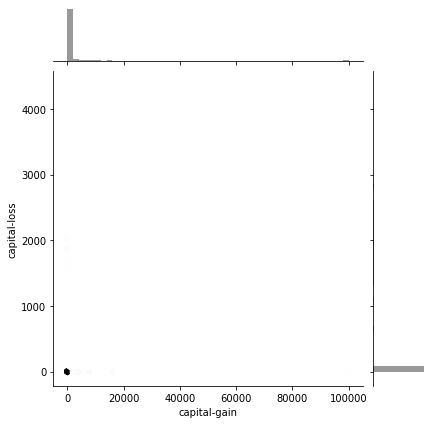

In [156]:
#Hexbin plot between capital-gain and capital-loss
sns.jointplot(x='capital-gain',y='capital-loss',data=df,kind='hexbin',color='k')

# OBSERVATION

Through this plot we can say that mainly of destiny lie at point 0. 

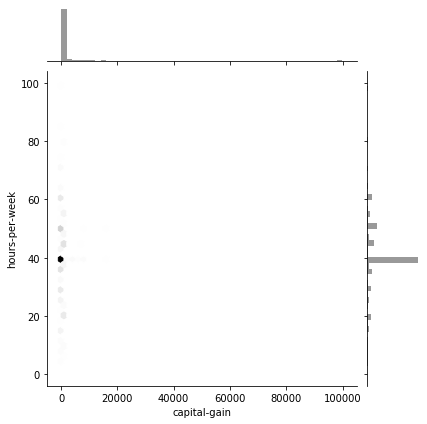

In [32]:
#Hexbin plot between capital-gain and hours-per-week 
sns.jointplot(x='capital-gain',y='hours-per-week',data=df,kind='hexbin',color='k')

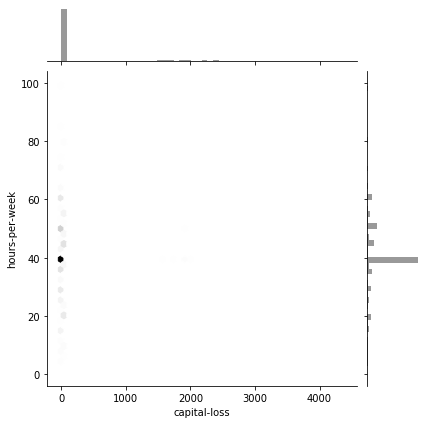

In [33]:
#Hexbin plot between capital-loss and hours-per-week 
sns.jointplot(x='capital-loss',y='hours-per-week',data=df,kind='hexbin',color='k')

# OBSERVATION

In above plot destiny is at 0 capital loss when there will be working 40 hours per week and sometimes more capital loss will occurs.

3. BOXPLOT

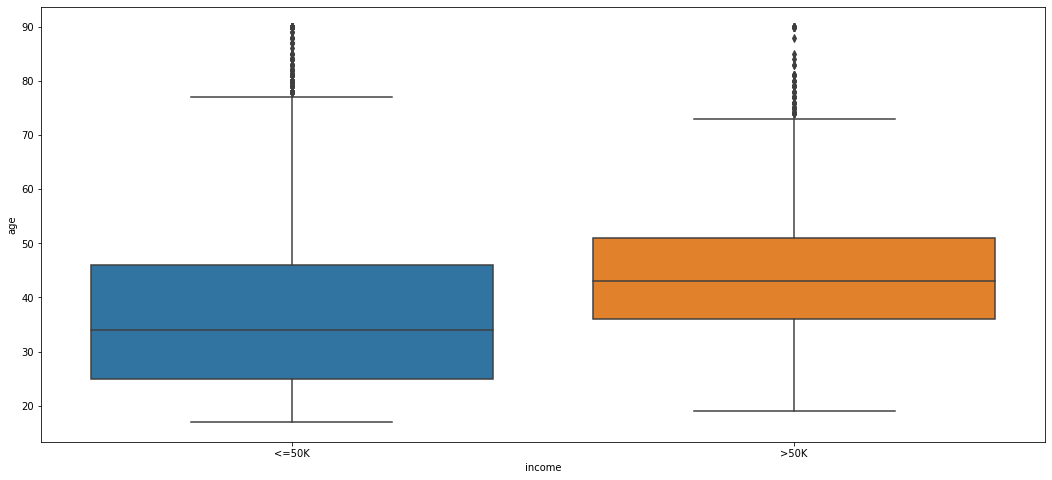

In [54]:
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='age',data=df)
plt.show()
           

# OBSERVATION

1. Outliers are present in both the income(<=50k and >50k)
2. Income group of <=50k has lower median than the income group of >50k

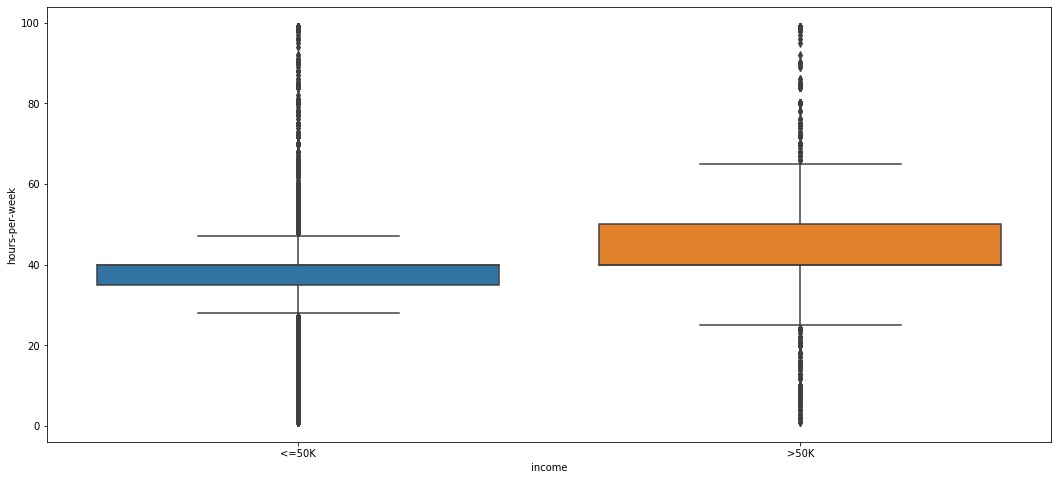

In [61]:
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='hours-per-week',data=df)
plt.show()
           

# OBSERVATION

1. The median hours-per-week of income group who earns 50k is greater than than the income goups who earns <=50k

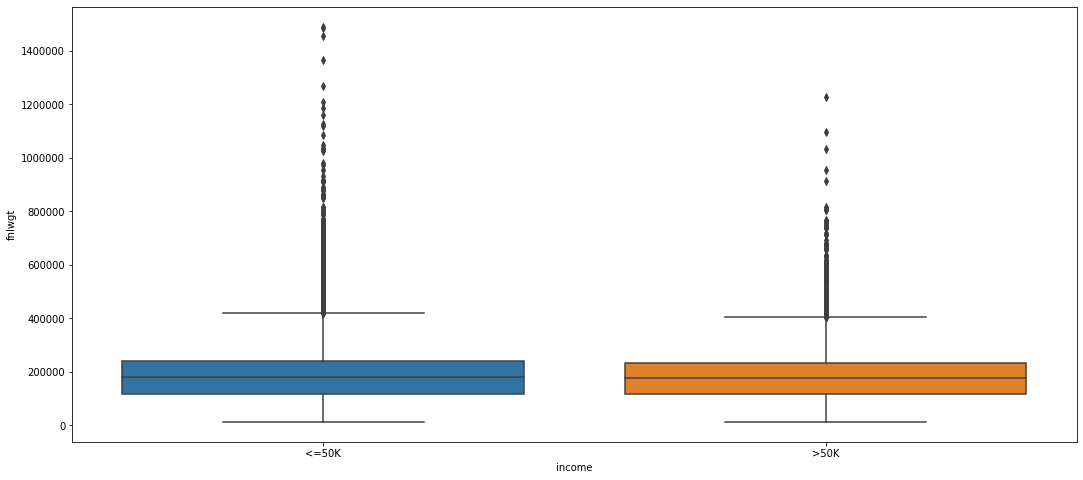

In [57]:
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='fnlwgt',data=df)
plt.show()
           

# OBSERVATION

Outliers are present in both the income group.

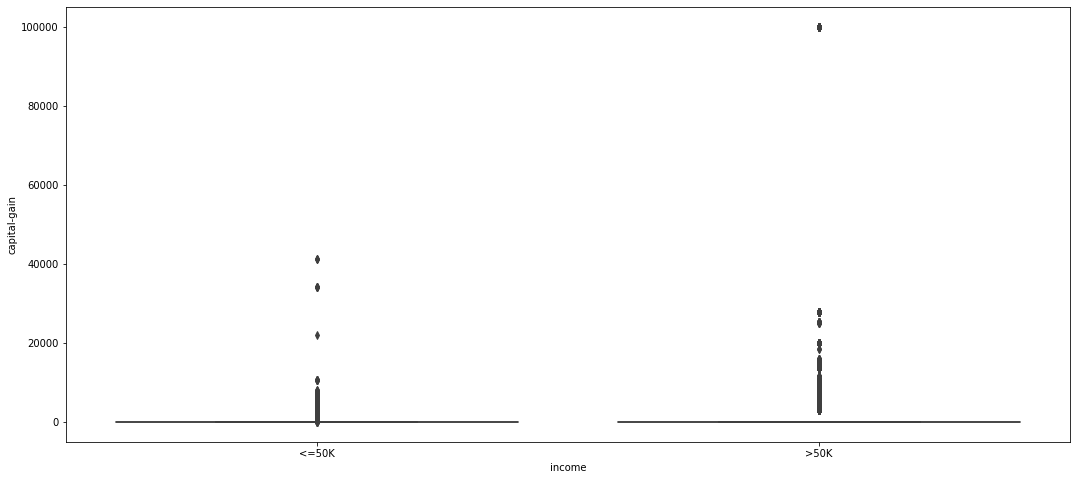

In [59]:
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='capital-gain',data=df)
plt.show()
           

# OBSERVATION

1. Most of the capital-gain is accumlated at the 0 or both the income group

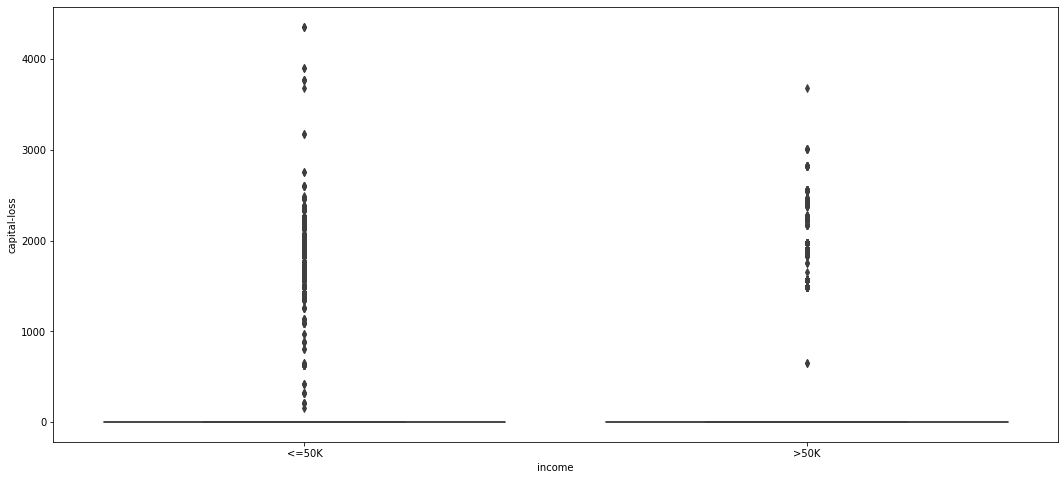

In [60]:
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='capital-loss',data=df)
plt.show()
           

# observation

1. This boxplot is similar to the capital-gain box plot.

4. BAR PLOT

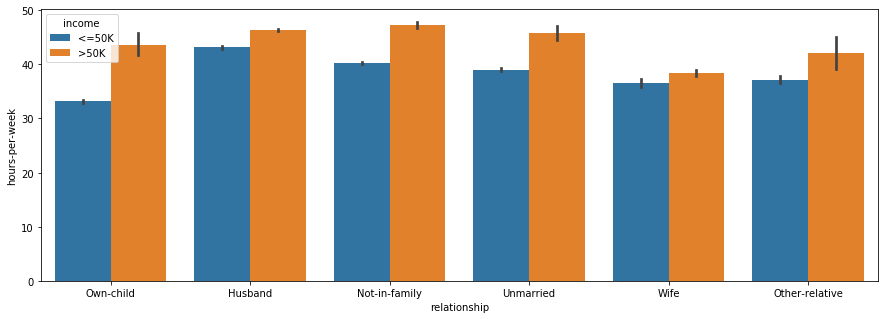

In [160]:

plt.figure(figsize=(15,5))
sns.barplot(x='relationship',y='hours-per-week',hue='income',data=df)
plt.show()

# OBSERVATION

From Barplot we observe that individual having the realationship with husband earns more income.

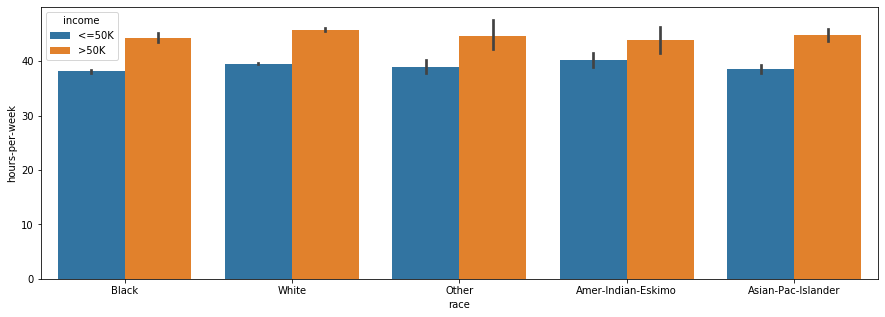

In [161]:

plt.figure(figsize=(15,5))
sns.barplot(x='race',y='hours-per-week',hue='income',data=df)
plt.show()

# OBSERVATION

White people are earning more income and working more hours-per week

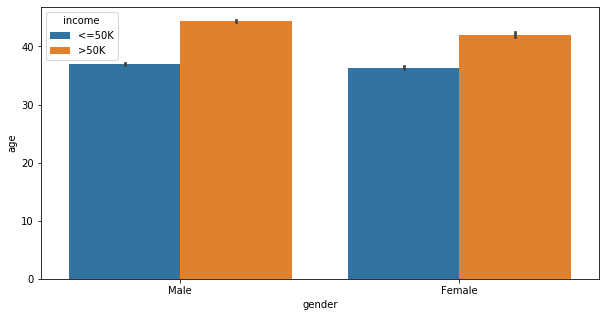

In [157]:
#Plotbetween capital-gain and capital-loss
plt.figure(figsize=(10,5))
sns.barplot(x='gender',y='age',hue='income',data=df)
plt.show()

# Observation

In barplot both individual  male and female come under.

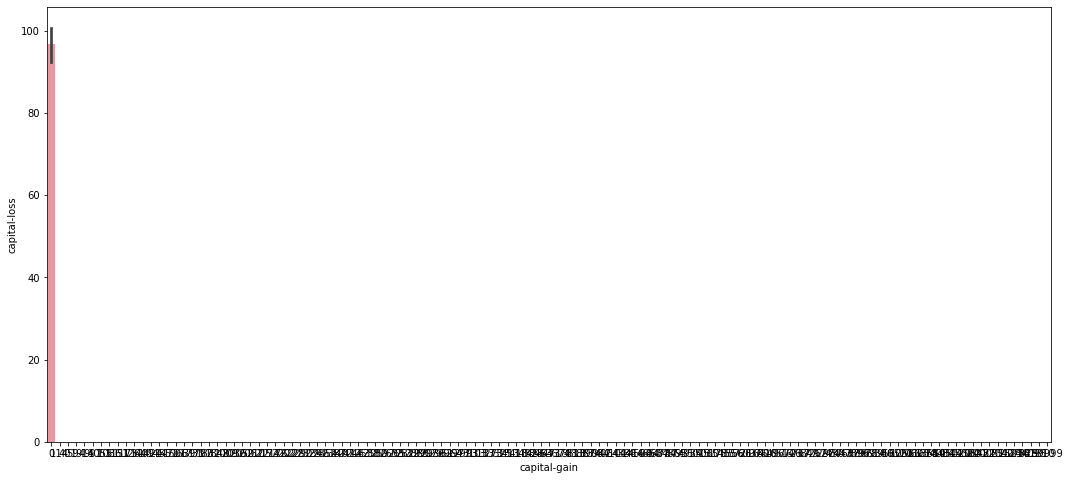

In [164]:
#Plotbetween capital-gain and capital-loss
plt.figure(figsize=(18,8))
sns.barplot(x='capital-gain',y='capital-loss',data=df)
plt.show()

# OBSERVATION

In above plot capital loss will be high when gain should be zero.

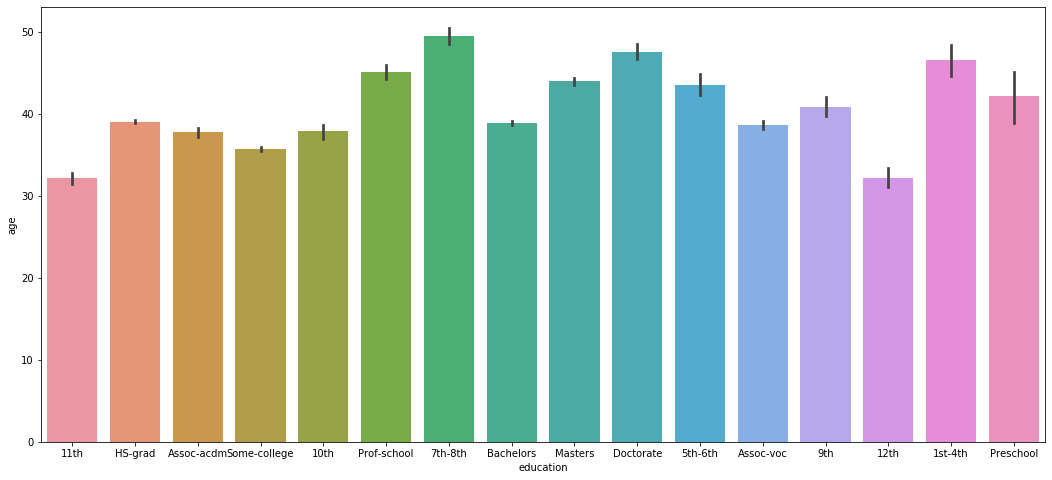

In [7]:
#Plotbetween education and age
plt.figure(figsize=(18,8))
sns.barplot(x='education',y='age',data=df)

# OBSERVATION

People above 40 years of age are belonging to the prof-school,7th-8th, masters,Doctorate,5-6 and 1-4

5. PAIR PLOT

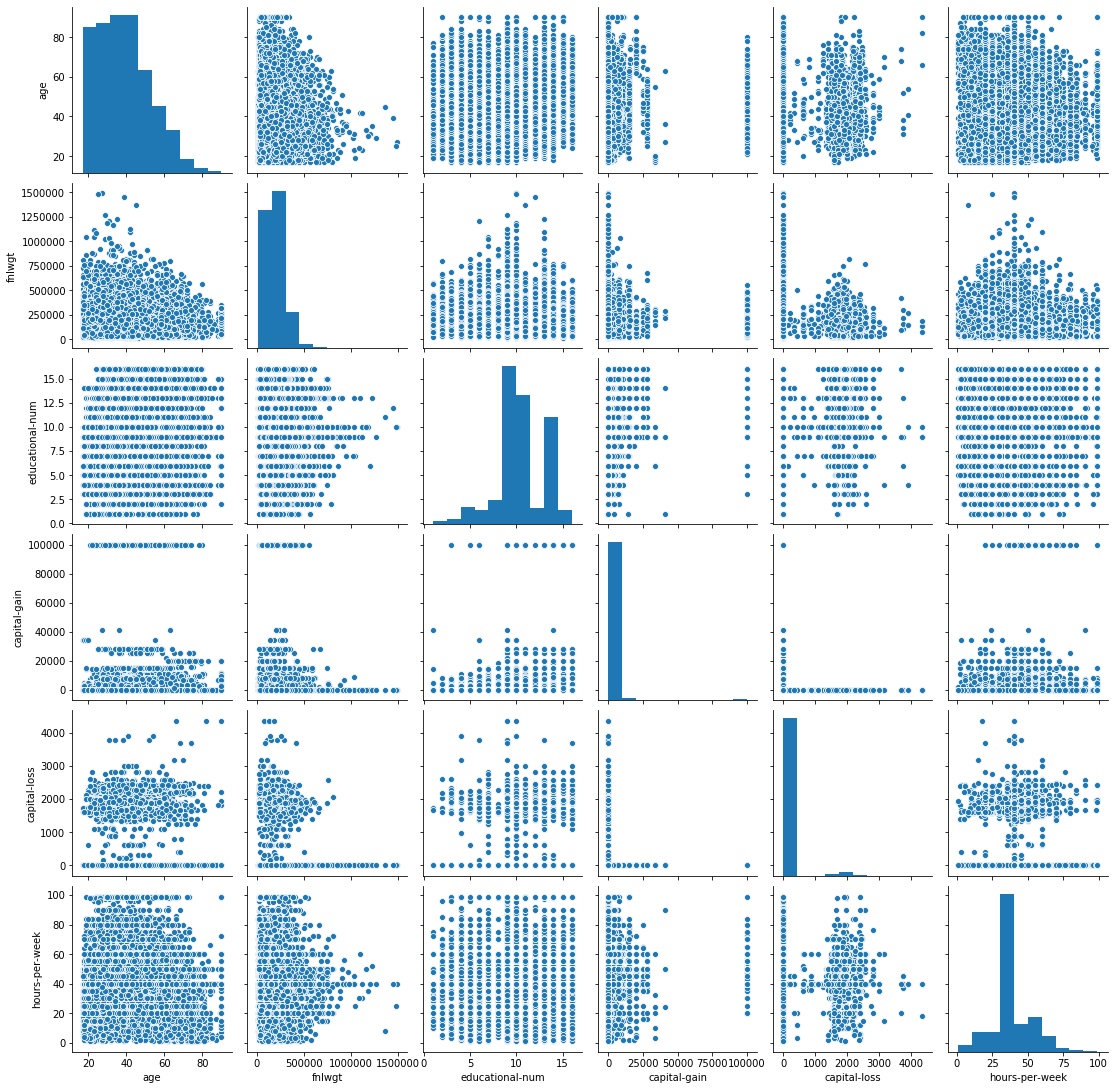

In [30]:
adult=pd.read_csv('adult.csv')
sns.pairplot(adult)

# OBSERVATION

1. The individual of age between ~18 to ~70 works most of the hours per week get the more paid income.
2. Age attribute has most of the people earn greater than 50k.
3. Income group who earns >50k have flexible working hours.
4. Most of the Individual more educational numbers have more income or greater.
5. Individuals having capital gain or no profit earns greater than 50k. whereas Individuals having capital loss or no loss earns lower than 50k.

# Conclusion of EDA:

-> Generally Individuals can be seen working for 30 hours to 40 hours per week.

-> Income group of Individual who earns >50k have flexible Working hours.

-> Education num attribute affecting the target.

-> Capital gain and Capital loss have most of the outliers.

-> Age is an asymmetric attribute.



In [247]:

# import MinMaxScaler from python lib.
from sklearn.preprocessing import MinMaxScaler

In [242]:
# pd.get_dummies for categorical variable to convert data into dummy variable
col=[]
for i in df:
    if df[i].dtype=='int64':
        col.append(i)
        scalar=MinMaxScaler()
        df[col]=scalar.fit_transform(df[col])


In [248]:
education=pd.get_dummies(df['education'],drop_first=True)

In [249]:
relationship=pd.get_dummies(df['relationship'],drop_first=True)

In [250]:
# label encoder from python library to convert variable into binary
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()

In [251]:
#df.income.replace(to_replace=<=50k,value=0,inplace=True)
#df.income.replace(to_replace=">50k",value=1,inplace=True)
income = scaler.fit_transform(df.income)
income_col = pd.DataFrame(income,columns=['>50k'])

In [252]:
male = scaler.fit_transform(df.gender)
male_col=pd.DataFrame(male,columns=['Male'])

In [253]:
obj=[]
for i in df:
    if df[i].dtype=="object":
        obj.append(i)


In [254]:
# drop the object datatype as we create the dummies
df.drop(obj,axis=1,inplace=True)


In [256]:
# pandas concat to concatenate the columns into dataframe
df=pd.concat([education,relationship],axis=1)
df=df.reset_index(drop=True,inplace=False)
df=pd.concat([df,male_col,income_col],axis=1)

In [257]:
df

,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,...,Preschool,Prof-school,Some-college,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Male,>50k
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
48839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
